# Pool all data and explore

In [1]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import re
from sklearn import datasets, linear_model
import seaborn as sns
from matplotlib import cm



In [2]:
def get_normalized_mean_amplitude_hwhm_per_epoch(peak_hwhm_csv_list):
    cum_peak_hwhm_dataframe_output = pd.DataFrame (columns = ['epoch','hwhm','amplitude','population'])    
    
    for file in peak_hwhm_csv_list:
        test_df = pd.read_csv(file)
        epochs = test_df['epoch'].drop_duplicates()
        epochs = epochs.to_list()

        populations = ['L2/3']
        populations_multiindex = np.repeat(populations,len(epochs))

        epochs_multiindex = np.tile(epochs,1)

        multiindex_plot = pd.MultiIndex.from_arrays([populations_multiindex,epochs_multiindex],names=('population', 'epoch') )

        for i,measure in enumerate(['amplitude','hwhm']):

            mean_s = test_df.set_index('epoch').groupby(['population', 'epoch'])[measure].mean()
            mean_s = mean_s.reindex(multiindex_plot)
            
            mean_df = mean_s.to_frame()
            mean_df = mean_df.reset_index()

            if measure == 'amplitude': 
                mean_amplitude_df = mean_df
            if measure == 'hwhm': 
                mean_hwhm_df = mean_df

        mean_hwhm_df = mean_hwhm_df.loc[mean_hwhm_df['population']=='L2/3']
        mean_amplitude_df = mean_amplitude_df.loc[mean_amplitude_df['population']=='L2/3']
        
        #Normalize to 'Only L4'
        mean_hwhm_L4input = mean_hwhm_df.hwhm.loc[mean_hwhm_df['epoch']=='Only L4 input'].values
        mean_hwhm_df.hwhm = mean_hwhm_df.hwhm/mean_hwhm_L4input
        mean_amplitude_L4input = mean_amplitude_df.amplitude.loc[mean_amplitude_df['epoch']=='Only L4 input'].values
        mean_amplitude_df.amplitude = mean_amplitude_df.amplitude/mean_amplitude_L4input
        
        mean_hwhm_df['amplitude'] = mean_amplitude_df['amplitude']
        cum_peak_hwhm_dataframe_temp = mean_hwhm_df 
        
        cum_peak_hwhm_dataframe_output = cum_peak_hwhm_dataframe_output.append(cum_peak_hwhm_dataframe_temp)    
    
    
    return cum_peak_hwhm_dataframe_output



In [3]:
parent_folder = '/Users/alexvourvoukelis/Desktop/DTP_rotation_2/Code/L5/simulations'

simulation_dirs = []
peak_hwhm_files = []
for root, directories, files in os.walk(parent_folder, topdown=False):
    for name in files:
        if 'population_peaks' in name:
            peak_hwhm_files.append(os.path.join(root, name))
    for name in directories:
        if 'temporaloffset' in name:
            simulation_dirs.append(os.path.join(root, name))
            

In [4]:
peak_hwhm_files_homogeneous_synch = []

for file in peak_hwhm_files:
    if 'homogeneous' in file:
        if '200ms' in file:
            if 'synchronous' in file:
                if 'asynchronous' not in file:
                    if 'test' in file:
                        peak_hwhm_files_homogeneous_synch.append(file)
peak_hwhm_files_homogeneous_synch.sort()

peak_hwhm_files_homogeneous_asynch = []

for file in peak_hwhm_files:
    if 'homogeneous' in file:
        if '200ms' in file:
            if 'asynchronous' in file:
                if 'test' in file:
                    peak_hwhm_files_homogeneous_asynch.append(file)
peak_hwhm_files_homogeneous_asynch.sort()

peak_hwhm_files_discrete_synch = []
for file in peak_hwhm_files:
    if 'discrete' in file:
        if '200ms' in file:
            if 'synchronous' in file:
                if 'asynchronous' not in file:
                    if 'test' in file:
                        peak_hwhm_files_discrete_synch.append(file)
peak_hwhm_files_discrete_synch.sort()

peak_hwhm_files_discrete_asynch = []
for file in peak_hwhm_files:
    if 'discrete' in file:
        if '200ms' in file:
            if 'asynchronous' in file:
                if 'test' in file:
                    peak_hwhm_files_discrete_asynch.append(file)
peak_hwhm_files_discrete_asynch.sort()

peak_hwhm_files_discrete_synch_varstr = []
for file in peak_hwhm_files:
    if 'discrete' in file:
        if '200ms' in file:
            if 'synchronous' in file:
                if 'varyingstrength' in file:
                    if 'asynchronous' not in file:
                        peak_hwhm_files_discrete_synch_varstr.append(file)
peak_hwhm_files_discrete_synch_varstr.sort()

peak_hwhm_files_discrete_asynch_varstr = []
for file in peak_hwhm_files:
    if 'discrete' in file:
        if '200ms' in file:
            if 'asynchronous' in file:
                if 'varyingstrength' in file:
                    peak_hwhm_files_discrete_asynch_varstr.append(file)
peak_hwhm_files_discrete_asynch_varstr.sort()


peak_hwhm_files_mixed_synch = []

for file in peak_hwhm_files:
    if 'homogeneous' in file:
        if '200ms' in file:
            if 'synchronous' in file:
                if 'asynchronous' not in file:
                    if 'test' in file:
                        peak_hwhm_files_mixed_synch.append(file)
peak_hwhm_files_mixed_synch.sort()


peak_hwhm_files_mixed_asynch = []

for file in peak_hwhm_files:
    if 'mixed' in file:
        if '200ms' in file:
            if 'synchronous' in file:
                if 'asynchronous' not in file:
                    if 'test' in file:
                        peak_hwhm_files_mixed_asynch.append(file)
peak_hwhm_files_mixed_asynch.sort()


In [5]:
iter_values = []
for file in peak_hwhm_files_discrete_asynch:
    match = re.search('iter\d', file)
    if match and match.group() not in iter_values:
        iter_values.append(match.group())

In [6]:
all_files = {'homogeneous_synchronous': peak_hwhm_files_homogeneous_synch,
             'homogeneous_asynchronous': peak_hwhm_files_homogeneous_asynch,
             'discrete_synchronous': peak_hwhm_files_discrete_synch,
             'discrete_asynchronous': peak_hwhm_files_discrete_asynch,
             'discrete_synchronous_varyingstrength': peak_hwhm_files_discrete_synch_varstr,
             'discrete_asynchronous_varyingstrength': peak_hwhm_files_discrete_asynch_varstr,
             'mixed_synchronous' : peak_hwhm_files_mixed_synch,
             'mixed_asynchronous' : peak_hwhm_files_mixed_asynch}

### Separate by simulation

In [7]:
all_files_separated = dict()

for simulation_label in all_files:
    iter_values = []
    for file in all_files[simulation_label]:
        iter_substring = re.search('iter\d', file)
        if iter_substring and iter_substring.group() not in iter_values:
            iter_values.append(iter_substring.group())
            
    all_files_separated[simulation_label] = dict() 

    for iter_label in iter_values:
        all_files_separated[simulation_label][iter_label] = [file for file in all_files[simulation_label] if iter_label in file] 
        

### Unpack and normalize data in both data storage formats

In [8]:
all_data_pooled = dict()
for label in all_files:
    all_data_pooled[label] = get_normalized_mean_amplitude_hwhm_per_epoch(all_files[label])
    all_data_pooled[label] = all_data_pooled[label].dropna()
    all_data_pooled[label] = all_data_pooled[label].reset_index()


In [9]:
all_data_separated = dict()
for label in all_files_separated:
    all_data_separated[label] = dict()
    for iter_label in all_files_separated[label]:
        all_data_separated[label][iter_label] =  get_normalized_mean_amplitude_hwhm_per_epoch(all_files_separated[label][iter_label])
        all_data_separated[label][iter_label] = all_data_separated[label][iter_label].dropna()
        all_data_separated[label][iter_label] = all_data_separated[label][iter_label].reset_index()

In [10]:
all_data_pooled['discrete_asynchronous']

,index,epoch,hwhm,amplitude,population
0,0,Only L4 input,1.000000,1.000000,L2/3
1,1,L5a -100 L5b -90 ms,0.876741,0.906603,L2/3
2,2,L5a -100 L5b -80 ms,0.810255,0.873371,L2/3
3,3,L5a -100 L5b -70 ms,0.811034,0.777011,L2/3
4,4,L5a -100 L5b -60 ms,0.779676,0.609510,L2/3
...,...,...,...,...,...
383,16,L5a 90 L5b 50 ms,0.896502,1.033625,L2/3
384,17,L5a 90 L5b 60 ms,1.042598,1.013556,L2/3
385,18,L5a 90 L5b 70 ms,0.986637,1.007203,L2/3
386,19,L5a 90 L5b 80 ms,0.961019,1.026065,L2/3


In [11]:
pd.set_option('display.max_rows', None)
all_data_pooled['discrete_asynchronous'].loc[(all_data_pooled['discrete_asynchronous'].amplitude>1.05) & (all_data_pooled['discrete_asynchronous'].hwhm<0.7)]

,index,epoch,hwhm,amplitude,population
214,11,L5a 0 L5b 10 ms,0.698845,1.27944,L2/3


In [11]:
# test = all_data_pooled['discrete_synchronous']
# min(test.amplitude)

0.014259659520005085

## Mixed 

In [12]:
# all_data_mixed_synchronous = all_data_pooled['mixed_synchronous']
# all_data_mixed_synchronous['model_type'] = 'mixed_synchronous'
# all_data_mixed_asynchronous = all_data_pooled['mixed_asynchronous']
# all_data_mixed_asynchronous['model_type'] = 'mixed_asynchronous'

# all_data_pooled_mixed = pd.concat([all_data_mixed_synchronous,all_data_mixed_asynchronous])

# ax = sns.jointplot(data = all_data_pooled_mixed, 
#                    x="hwhm", 
#                    y="amplitude",
#                    hue='model_type', 
#                    kind="kde",
#                    legend=False)
# ax.ax_joint.axvline(1,ls = '--')
# ax.ax_joint.axhline(1,ls = '--')
# # ax.ax_joint.set_xlabel('HWHM (normalized to "Only L4")')
# # ax.ax_joint.set_ylabel('Amplitude (normalized to "Only L4")')

# ax.ax_joint.set_xlim([-0.3085342986019695, 2.5])
# ax.ax_joint.set_ylim([-0.32956932214515, 2])

# r1 = patches.Rectangle((1,1), ax.ax_joint.get_xlim()[0]*10000, +ax.ax_joint.get_ylim()[1], color="tab:blue",alpha=0.25)
# ax.ax_joint.add_patch(r1)

# r3 = patches.Rectangle((1,1), -ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:red",alpha=0.25)
# ax.ax_joint.add_patch(r3)

# r2 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, +ax.ax_joint.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
# ax.ax_joint.add_patch(r2)

# r4 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:green",alpha=0.25)
# ax.ax_joint.add_patch(r4)

# plt.legend(['mixed synchronous','mixed asynchronous'],bbox_to_anchor=(1, 0.95))
# ax.savefig("/".join((parent_folder,'cumulative_plots','kde_mixed_synch_asynch_all_norm_hwhm_amplitude_scatter.pdf')))

## Homogeneous - Discrete synchronous

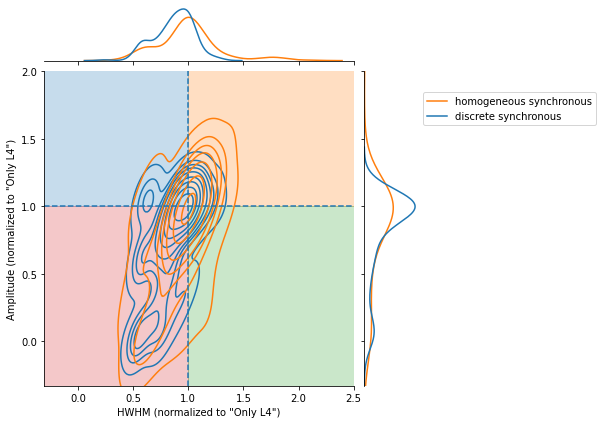

In [13]:
all_data_discrete_synchronous = all_data_pooled['discrete_synchronous']
all_data_discrete_synchronous['model_type'] = 'discrete_synchronous'
all_data_homogeneous_synchronous = all_data_pooled['homogeneous_synchronous']
all_data_homogeneous_synchronous['model_type'] = 'homogeneous_synchronous'

all_data_pooled_synchronous = pd.concat([all_data_discrete_synchronous,all_data_homogeneous_synchronous])

ax = sns.jointplot(data = all_data_pooled_synchronous, 
                   x="hwhm", 
                   y="amplitude",
                   hue='model_type', 
                   kind="kde",
                   legend=False)
ax.ax_joint.axvline(1,ls = '--')
ax.ax_joint.axhline(1,ls = '--')
ax.ax_joint.set_xlabel('HWHM (normalized to "Only L4")')
ax.ax_joint.set_ylabel('Amplitude (normalized to "Only L4")')

ax.ax_joint.set_xlim([-0.3085342986019695, 2.5])
ax.ax_joint.set_ylim([-0.32956932214515, 2])

r1 = patches.Rectangle((1,1), ax.ax_joint.get_xlim()[0]*10000, +ax.ax_joint.get_ylim()[1], color="tab:blue",alpha=0.25)
ax.ax_joint.add_patch(r1)

r3 = patches.Rectangle((1,1), -ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:red",alpha=0.25)
ax.ax_joint.add_patch(r3)

r2 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, +ax.ax_joint.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
ax.ax_joint.add_patch(r2)

r4 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:green",alpha=0.25)
ax.ax_joint.add_patch(r4)

plt.legend(['homogeneous synchronous','discrete synchronous'],bbox_to_anchor=(1, 0.95))
ax.savefig("/".join((parent_folder,'cumulative_plots','kde_synchronous_all_norm_hwhm_amplitude_scatter.pdf')))

## Homogeneous - Discrete synchronous


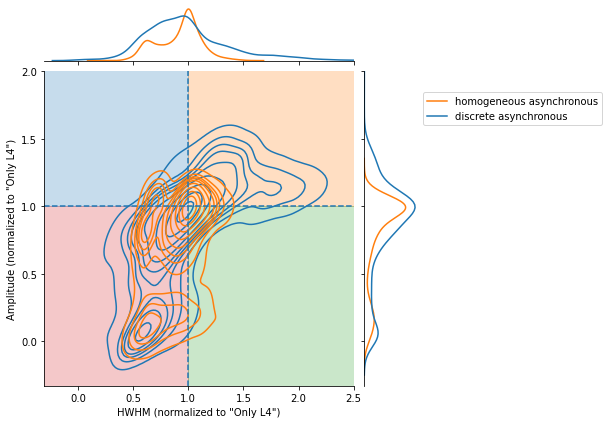

In [14]:
all_data_discrete_asynchronous = all_data_pooled['discrete_asynchronous']
all_data_discrete_asynchronous['model_type'] = 'discrete_asynchronous'
all_data_homogeneous_asynchronous = all_data_pooled['homogeneous_asynchronous']
all_data_homogeneous_asynchronous['model_type'] = 'homogeneous_asynchronous'

all_data_pooled_asynchronous = pd.concat([all_data_discrete_asynchronous,all_data_homogeneous_asynchronous])


ax = sns.jointplot(data = all_data_pooled_asynchronous, 
                   x="hwhm", 
                   y="amplitude",
                   hue='model_type', 
                   kind="kde",
                   legend=False)
ax.ax_joint.axvline(1,ls = '--')
ax.ax_joint.axhline(1,ls = '--')
ax.ax_joint.set_xlabel('HWHM (normalized to "Only L4")')
ax.ax_joint.set_ylabel('Amplitude (normalized to "Only L4")')

ax.ax_joint.set_xlim([-0.3085342986019695, 2.5])
ax.ax_joint.set_ylim([-0.32956932214515, 2])


# print(ax.ax_joint.get_xlim())
# print(ax.ax_joint.get_ylim())

r1 = patches.Rectangle((1,1), ax.ax_joint.get_xlim()[0]*30, +ax.ax_joint.get_ylim()[1], color="tab:blue",alpha=0.25)
ax.ax_joint.add_patch(r1)

r3 = patches.Rectangle((1,1), -ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:red",alpha=0.25)
ax.ax_joint.add_patch(r3)

r2 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, +ax.ax_joint.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
ax.ax_joint.add_patch(r2)

r4 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:green",alpha=0.25)
ax.ax_joint.add_patch(r4)

plt.legend(['homogeneous asynchronous','discrete asynchronous'],bbox_to_anchor=(1, 0.95))


ax.savefig("/".join((parent_folder,'cumulative_plots','kde_asynchronous_all_norm_hwhm_amplitude_scatter.pdf')))

### Homogeneous asynchronous only

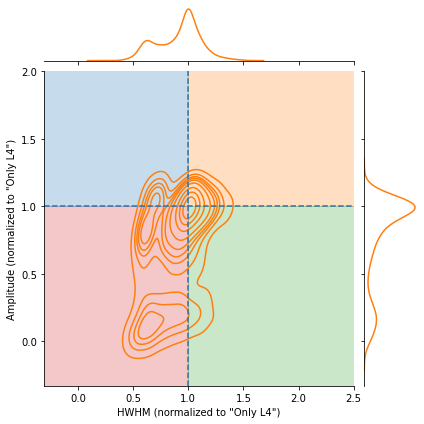

In [34]:
all_data_discrete_asynchronous = all_data_pooled['discrete_asynchronous']
all_data_discrete_asynchronous['model_type'] = 'discrete_asynchronous'
all_data_homogeneous_asynchronous = all_data_pooled['homogeneous_asynchronous']
all_data_homogeneous_asynchronous['model_type'] = 'homogeneous_asynchronous'

all_data_pooled_asynchronous = pd.concat([all_data_discrete_asynchronous,all_data_homogeneous_asynchronous])


ax = sns.jointplot(data = all_data_homogeneous_asynchronous, 
                   x="hwhm", 
                   y="amplitude",
                   color='C1',
                   kind="kde",
                   legend=False)
ax.ax_joint.axvline(1,ls = '--')
ax.ax_joint.axhline(1,ls = '--')
ax.ax_joint.set_xlabel('HWHM (normalized to "Only L4")')
ax.ax_joint.set_ylabel('Amplitude (normalized to "Only L4")')

ax.ax_joint.set_xlim([-0.3085342986019695, 2.5])
ax.ax_joint.set_ylim([-0.32956932214515, 2])



# print(ax.ax_joint.get_xlim())
# print(ax.ax_joint.get_ylim())

r1 = patches.Rectangle((1,1), ax.ax_joint.get_xlim()[0]*30, +ax.ax_joint.get_ylim()[1], color="tab:blue",alpha=0.25)
ax.ax_joint.add_patch(r1)

r3 = patches.Rectangle((1,1), -ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:red",alpha=0.25)
ax.ax_joint.add_patch(r3)

r2 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, +ax.ax_joint.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
ax.ax_joint.add_patch(r2)

r4 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:green",alpha=0.25)
ax.ax_joint.add_patch(r4)

# plt.legend(['homogeneous asynchronous','discrete asynchronous'],bbox_to_anchor=(1, 0.95))


ax.savefig("/".join((parent_folder,'cumulative_plots','kde_homogeneous_asynchronous_all_norm_hwhm_amplitude_scatter.pdf')))

### Discrete asynchronous only

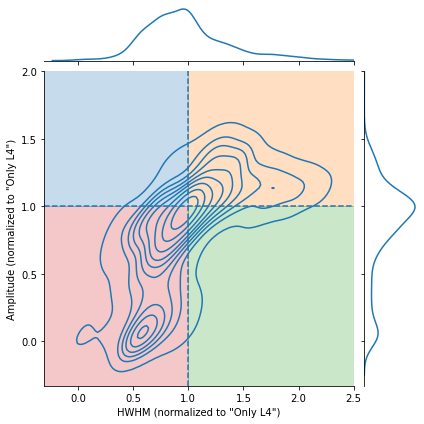

In [35]:
all_data_discrete_asynchronous = all_data_pooled['discrete_asynchronous']
all_data_discrete_asynchronous['model_type'] = 'discrete_asynchronous'
all_data_homogeneous_asynchronous = all_data_pooled['homogeneous_asynchronous']
all_data_homogeneous_asynchronous['model_type'] = 'homogeneous_asynchronous'

all_data_pooled_asynchronous = pd.concat([all_data_discrete_asynchronous,all_data_homogeneous_asynchronous])


ax = sns.jointplot(data = all_data_discrete_asynchronous, 
                   x="hwhm", 
                   y="amplitude",
                   color='C0',
                   kind="kde",
                   
                   legend=False
                   )
ax.ax_joint.axvline(1,ls = '--')
ax.ax_joint.axhline(1,ls = '--')
ax.ax_joint.set_xlabel('HWHM (normalized to "Only L4")')
ax.ax_joint.set_ylabel('Amplitude (normalized to "Only L4")')

ax.ax_joint.set_xlim([-0.3085342986019695, 2.5])
ax.ax_joint.set_ylim([-0.32956932214515, 2])



# print(ax.ax_joint.get_xlim())
# print(ax.ax_joint.get_ylim())

r1 = patches.Rectangle((1,1), ax.ax_joint.get_xlim()[0]*30, +ax.ax_joint.get_ylim()[1], color="tab:blue",alpha=0.25)
ax.ax_joint.add_patch(r1)

r3 = patches.Rectangle((1,1), -ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:red",alpha=0.25)
ax.ax_joint.add_patch(r3)

r2 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, +ax.ax_joint.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
ax.ax_joint.add_patch(r2)

r4 = patches.Rectangle((1,1), +ax.ax_joint.get_xlim()[1]*2, -ax.ax_joint.get_ylim()[1]*2, color="tab:green",alpha=0.25)
ax.ax_joint.add_patch(r4)

# plt.legend(['homogeneous asynchronous','discrete asynchronous'],bbox_to_anchor=(1, 0.95))


ax.savefig("/".join((parent_folder,'cumulative_plots','kde_discrete_asynchronous_all_norm_hwhm_amplitude_scatter.pdf')))

# Discrete

In [ ]:
# discrete_all = get_normalized_mean_amplitude_hwhm_per_epoch(peak_hwhm_files_discrete)
# discrete_all = discrete_all.reset_index(drop=True)

# model_plotting_title = 'Discrete'

In [ ]:
# discrete_all

In [ ]:
# epochs_plot = discrete_all['epoch']
# epochs_plot = epochs_plot.to_list()

# fig = plt.figure(figsize = (18,7))
# ax = plt.axes()

# # x_axis = np.arange(0,len(epochs_plot))
# ax.scatter(discrete_all.hwhm,discrete_all.amplitude,color='k')
# ax.set_xlabel('HWHM (normalized to "Only L4")')
# ax.xaxis.label.set_size(15)
# ax.set_ylabel('Amplitude (normalized to "Only L4")')
# ax.yaxis.label.set_size(15)
# # ax.set_ylim([0, 1.6])
# # ax.set_xlim([0.4, 2.8])

# plt.axvline(1,ls = '--')
# plt.axhline(1,ls = '--')

# print(ax.get_ylim())

# labels_fontsize = 13
# ###########################
# #amplified and sharpened
# ###########################
# r1 = patches.Rectangle((1,1), -ax.get_xlim()[0]*2, +ax.get_ylim()[1], color="tab:blue",alpha=0.25)
# ax.add_patch(r1)

# amplified_sharpened = []
# for i,amp in enumerate(discrete_all.amplitude):
#     if amp >1:
#         if (discrete_all.hwhm)[i] < 1:
#             amplified_sharpened.append(epochs_plot[i])
            
# # # these are matplotlib.patch.Patch properties
# amp_sharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_sharp_title_bbox = ax.text(-0.3, 1, 'amplified & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=amp_sharp_title)
# # amp_sharp_epochs_bbox = ax.text(-0.3, 0.9,'\n'.join(amplified_sharpened), transform=ax.transAxes, fontsize=labels_fontsize,
# #         verticalalignment='top', bbox=amp_sharp_title)


# ###########################
# #dampened and sharpened
# ###########################
# r3 = patches.Rectangle((1,1), -ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:red",alpha=0.25)
# ax.add_patch(r3)

# dampened_sharpened = []
# for i,amp in enumerate(discrete_all.amplitude ):
#     if amp <1:
#         if (discrete_all.hwhm )[i] <1:
#             dampened_sharpened.append(epochs_plot[i])
            
            
# # # these are matplotlib.patch.Patch properties
# damp_sharp_title = dict(boxstyle='round', facecolor="tab:red",alpha=0.25)
# damp_sharp_title_bbox = ax.text(-0.3, 0.5, 'dampened & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=damp_sharp_title)

# ##########################
# #amplified and un-sharpened
# ###########################

# r2 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, +ax.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
# ax.add_patch(r2)

# amplified_unsharpened = []
# for i,amp in enumerate(discrete_all.amplitude ):
#     if amp >1:
#         if (discrete_all.hwhm )[i] >1:
             
#             amplified_unsharpened.append(epochs_plot[i])
            
# amp_unsharp_title = dict(boxstyle='round', facecolor="tab:orange",alpha=0.25)
# amp_unsharp_title_bbox = ax.text(1.05, 1, 'amplified & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=amp_unsharp_title)

# # amp_unsharp_epochs_bbox = ax.text(1.05, 0.9,'\n'.join(amplified_unsharpened), transform=ax.transAxes, fontsize=labels_fontsize,
# #         verticalalignment='top', bbox=amp_unsharp_title)

# ###########################
# #dampened and un-sharpened
# ###########################
# r4 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:green",alpha=0.25)
# ax.add_patch(r4)

# dampened_unsharpened = []
# for i,amp in enumerate(discrete_all.amplitude ):
#     if amp <1:
#         if discrete_all.hwhm[i] >1:
#             dampened_unsharpened.append(epochs_plot[i])
            
            
# damp_unsharp_title = dict(boxstyle='round', facecolor="tab:green",alpha=0.25)
# damp_unsharp_title_bbox = ax.text(1.05, 0.3, 'dampened & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=damp_unsharp_title)


# fig.suptitle('Discrete - asynchronous - (L5a:L5b) (9:1) : ALL',fontsize=20)
# plt.tight_layout()
# plt.show()


# # fig.savefig("/".join((parent_folder,'cumulative_plots/discrete_asynchronous_varyingstrength_a09b01_all_norm_hwhm_amplitude_scatter_iter0.pdf')))

# Homogeneous

In [ ]:
# homogeneous_all = all_data_separated['homogeneous_asynchronous']
# # homogeneous_all = homogeneous_all.reset_index()

# model_plotting_title = 'Homogeneous'

In [ ]:
# epochs_plot = homogeneous_all['epoch']
# epochs_plot = epochs_plot.to_list()

# fig = plt.figure(figsize = (18,7))
# ax = plt.axes()

# # x_axis = np.arange(0,len(epochs_plot))
# ax.scatter(homogeneous_all.hwhm,homogeneous_all.amplitude,color='k')
# ax.set_xlabel('HWHM (normalized to "Only L4")')
# ax.xaxis.label.set_size(15)
# ax.set_ylabel('Amplitude (normalized to "Only L4")')
# ax.yaxis.label.set_size(15)
# ax.set_ylim([0, 1.6])
# ax.set_xlim([0.4, 2.8])

# plt.axvline(1,ls = '--')
# plt.axhline(1,ls = '--')

# print(ax.get_ylim())

# labels_fontsize = 13
# ###########################
# #amplified and sharpened
# ###########################
# r1 = patches.Rectangle((1,1), -ax.get_xlim()[0]*2, +ax.get_ylim()[1], color="tab:blue",alpha=0.25)
# ax.add_patch(r1)

# amplified_sharpened = []
# for i,amp in enumerate(homogeneous_all.amplitude):
#     if amp >1:
#         if (homogeneous_all.hwhm)[i] < 1:
#             amplified_sharpened.append(epochs_plot[i])
            
# # # these are matplotlib.patch.Patch properties
# amp_sharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_sharp_title_bbox = ax.text(-0.3, 1, 'amplified & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=amp_sharp_title)
# # amp_sharp_epochs_bbox = ax.text(-0.3, 0.9,'\n'.join(amplified_sharpened), transform=ax.transAxes, fontsize=labels_fontsize,
# #         verticalalignment='top', bbox=amp_sharp_title)


# ###########################
# #dampened and sharpened
# ###########################
# r3 = patches.Rectangle((1,1), -ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:red",alpha=0.25)
# ax.add_patch(r3)

# dampened_sharpened = []
# for i,amp in enumerate(homogeneous_all.amplitude ):
#     if amp <1:
#         if (homogeneous_all.hwhm )[i] <1:
#             dampened_sharpened.append(epochs_plot[i])
            
            
# # # these are matplotlib.patch.Patch properties
# damp_sharp_title = dict(boxstyle='round', facecolor="tab:red",alpha=0.25)
# damp_sharp_title_bbox = ax.text(-0.3, 0.5, 'dampened & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=damp_sharp_title)

# ##########################
# #amplified and un-sharpened
# ###########################

# r2 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, +ax.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
# ax.add_patch(r2)

# amplified_unsharpened = []
# for i,amp in enumerate(homogeneous_all.amplitude ):
#     if amp >1:
#         if (homogeneous_all.hwhm )[i] >1:
             
#             amplified_unsharpened.append(epochs_plot[i])
            
# amp_unsharp_title = dict(boxstyle='round', facecolor="tab:orange",alpha=0.25)
# amp_unsharp_title_bbox = ax.text(1.05, 1, 'amplified & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=amp_unsharp_title)

# # amp_unsharp_epochs_bbox = ax.text(1.05, 0.9,'\n'.join(amplified_unsharpened), transform=ax.transAxes, fontsize=labels_fontsize,
# #         verticalalignment='top', bbox=amp_unsharp_title)

# ###########################
# #dampened and un-sharpened
# ###########################
# r4 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:green",alpha=0.25)
# ax.add_patch(r4)

# dampened_unsharpened = []
# for i,amp in enumerate(homogeneous_all.amplitude ):
#     if amp <1:
#         if homogeneous_all.hwhm[i] >1:
#             dampened_unsharpened.append(epochs_plot[i])
            
            
# damp_unsharp_title = dict(boxstyle='round', facecolor="tab:green",alpha=0.25)
# damp_unsharp_title_bbox = ax.text(1.05, 0.3, 'dampened & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=damp_unsharp_title)


# fig.suptitle('Homogeneous - asynchronous : ALL',fontsize=20)
# plt.tight_layout()
# plt.show()


# # fig.savefig("/".join((parent_folder,'cumulative_plots/test_homogeneous_asynchronous_all_norm_hwhm_amplitude_scatter_iter4.pdf')))

## Amplified & Sharpened

In [ ]:
homogeneous_all_ampl_sharp = homogeneous_all[homogeneous_all.epoch.isin(amplified_sharpened)]

# if homogeneous_all_ampl_sharp

L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_ampl_sharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
homogeneous_all_ampl_sharp = homogeneous_all_ampl_sharp.assign(L5a_timing = L5a_timing)
homogeneous_all_ampl_sharp = homogeneous_all_ampl_sharp.assign(L5b_timing = L5b_timing)

homogeneous_all_ampl_sharp['L5a_timing'] = pd.Categorical(homogeneous_all_ampl_sharp.L5a_timing)
homogeneous_all_ampl_sharp['L5b_timing'] = pd.Categorical(homogeneous_all_ampl_sharp.L5b_timing)




homogeneous_all_ampl_sharp = homogeneous_all_ampl_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

homogeneous_all_ampl_sharp = homogeneous_all_ampl_sharp.sort_values(by=['L5a_timing','L5b_timing'],ascending=[True,True])

unique_L5a_timing = np.unique(homogeneous_all_ampl_sharp.L5a_timing.values)
unique_L5b_timing = np.unique(homogeneous_all_ampl_sharp.L5b_timing.values)

colormap_L5a = sns.color_palette('tab20', len(unique_L5a_timing))
colormap_L5b = sns.color_palette('tab20b', len(unique_L5b_timing))

# facecolor = [cm.viridis(i/float(len(unique_L5a_timing)-1)) for i in range(len(unique_L5a_timing))]
# edgecolor = [cm.cool(i/float(len(unique_L5b_timing)-1)) for i in range(len(unique_L5b_timing))]

# Draw Plot for Each Category
fig = plt.figure(figsize=(16, 10), dpi= 80)

for i, L5atiming in enumerate(unique_L5a_timing):
    for j, L5btiming in enumerate(unique_L5b_timing):
        plt.scatter('hwhm', 'amplitude', 
                    data=homogeneous_all_ampl_sharp.loc[(homogeneous_all_ampl_sharp.L5a_timing==L5atiming)&(homogeneous_all_ampl_sharp.L5a_timing==L5btiming)], 
                    s=100,
                    linewidth = 3,
                    facecolor=colormap_L5a[i], 
                    edgecolor = colormap_L5b[j],
                    label=''.join(('L5a:',str(unique_L5a_timing[i]),' L5b:',str(unique_L5b_timing[j])))
                   )
    
    #label=str(category))
    
    
# fg = sns.FacetGrid(data=homogeneous_all_ampl_sharp, 
#                        hue='L5a_timing', 
#                        hue_order=unique_L5a_timing,
# #                        palette='tab20',
# #                        hue_kws={"facecolor": viridis_L5a,
# #                                 "edgecolor": cool_L5b},
#                        aspect=2,
#                        height=6)
# fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
# ax = fg.ax

plt.title('Homogeneous (all) \n Amplified & Sharpened')
plt.xlabel('HWHM (normalized to "Only L4")')
plt.ylabel('Amplitude (normalized to "Only L4")')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
# plt.colorbar()
plt.show()

# fg.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_ampl_sharp_norm_hwhm_amplitude_scatter.pdf')))

In [ ]:
homogeneous_all_ampl_sharp.to_csv('simulations/exampledata.csv')

In [ ]:
colormap_L5a

In [ ]:
colormap_L5b

In [ ]:
from itertools import combinations

pairs = combinations(np.arange(-100,110,10),2)
pairs = list(pairs)
iterations = []
for locked_offset in np.arange(-100,100,10):
    temp_locked_offset_group = []
    for pair in pairs:
        if pair[0]==locked_offset:
            temp_locked_offset_group.append(pair)
    iterations.append(temp_locked_offset_group)
    
            



In [ ]:
for iteration in iterations:
    print(iteration[0][0])

In [ ]:
# homogeneous_all_ampl_sharp = homogeneous_all[homogeneous_all.epoch.isin(amplified_sharpened)]

homogeneous_all_ampl_sharp = homogeneous_all_ampl_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])
homogeneous_all_ampl_sharp_hwhm90 = homogeneous_all_ampl_sharp[homogeneous_all_ampl_sharp['hwhm']<0.9]

homogeneous_all_ampl_sharp_hwhm90 = homogeneous_all_ampl_sharp_hwhm90.sort_values(by=['L5a_timing','L5b_timing'],ascending=[True,True])


fg = sns.FacetGrid(data=homogeneous_all_ampl_sharp_hwhm90, 
                       hue='epoch', 
                       hue_order=homogeneous_all_ampl_sharp_hwhm90['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax

plt.title('Homogeneous (all) \n Amplified & Sharpened \n hwhm<0.9')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

# ax.text(0.1, 0.9, '--> Note "L5a 0 L5b 10" vs "L5a 0 L5b 20" ', transform=ax.transAxes)

plt.show()

fg.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_ampl_sharp_norm_hwhm<0.9_amplitude_scatter.pdf')))

In [ ]:
L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_ampl_sharp_hwhm90.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])

fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(L5a_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(L5b_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax2.set_ylim(ax1.get_ylim())

  
fig.suptitle('Amplified & Sharpened - Homogeneous (hwhm<0.9)')
plt.tight_layout()
plt.show()

fig.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_ampl_sharp_norm_hwhm<0.9_amplitude_timingshist.pdf')))

In [ ]:

L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_ampl_sharp_hwhm90.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
homogeneous_all_ampl_sharp_hwhm90 = homogeneous_all_ampl_sharp_hwhm90.assign(L5a_timing = L5a_timing)
homogeneous_all_ampl_sharp_hwhm90 = homogeneous_all_ampl_sharp_hwhm90.assign(L5b_timing = L5b_timing)

indices_10_either = []
for index in np.arange(0,len(L5a_timing)):
    if L5a_timing[index]==10:
        indices_10_either.append(index)
    elif L5b_timing[index]==10:
        indices_10_either.append(index) 

indices_non10_either = [i for i in np.arange(0,len(L5a_timing)) if i not in indices_10_either]        
print(''.join(('Simulations of 10 ms timing in L5a or L5b: ',str(len(indices_10_either)))))
print(''.join(('Simulations of non-10 ms timing neither in L5a nor L5b: ',str(len(indices_non10_either)))))


homogeneous_all_ampl_sharp_hwhm90 = homogeneous_all_ampl_sharp_hwhm90.assign(non_10ms_timing = 
                                                                             (homogeneous_all_ampl_sharp_hwhm90['L5a_timing']+
                                                                              homogeneous_all_ampl_sharp_hwhm90['L5b_timing']-
                                                                              10))

# # homogeneous_all_ampl_sharp_hwhm90.plot('non_10ms_timing','hwhm','scatter')
f, axes = plt.subplots(1, 2, figsize = (15,5))
for i,measure in enumerate(['amplitude','hwhm']):
    x = homogeneous_all_ampl_sharp_hwhm90.non_10ms_timing.values
    y = homogeneous_all_ampl_sharp_hwhm90[measure].to_list()
    y = np.array(y)

    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)



    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    axes[i].scatter(x, y,  color='black')
#     axes[i].plot(x, regr.predict(x), color='blue', linewidth=3)
    axes[i].set_title(measure)
    axes[i].set_ylabel(measure)
    axes[i].set_xlabel('non-10ms timing')
    
f.suptitle(''.join(('Homogeneous (all) \n Amplified & Sharpened \n (hwhm < 90% of "Only L4"hwhm) \n non-10ms timing')))
plt.tight_layout()
plt.show()


## Dampened & Sharpened

In [ ]:
homogeneous_all_damp_sharp = homogeneous_all[homogeneous_all.epoch.isin(dampened_sharpened)]

L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_sharp['epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
homogeneous_all_damp_sharp = homogeneous_all_damp_sharp.assign(L5a_timing = L5a_timing)
homogeneous_all_damp_sharp = homogeneous_all_damp_sharp.assign(L5b_timing = L5b_timing)




homogeneous_all_damp_sharp = homogeneous_all_damp_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

homogeneous_all_damp_sharp = homogeneous_all_damp_sharp.sort_values(by=['L5a_timing', 'L5b_timing'], ascending=[True, True])

fg = sns.FacetGrid(data=homogeneous_all_damp_sharp, 
                       hue='epoch', 
                       hue_order=homogeneous_all_damp_sharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend(ncol=3)
ax = fg.ax

plt.title('Homogeneous (all) \n Dampened & Sharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

plt.show()

fg.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_ALL_damp_sharp_norm_hwhm_amplitude_scatter.pdf')))

In [ ]:
L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_sharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])

fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(L5a_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(L5b_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax2.set_ylim(ax1.get_ylim())

  
fig.suptitle('Damplened & Sharpened - Homogeneous (all)')
plt.tight_layout()
plt.show()

fig.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_damp_sharp_all_timingshist.pdf')))

### Homogeneous (all)  Dampened & Sharpened  
#### (amplitude < 20% of "Only L4"amplitude)

In [ ]:
homogeneous_all_damp_sharp_ampless20 = homogeneous_all_damp_sharp[homogeneous_all_damp_sharp['amplitude']<0.20]

homogeneous_all_damp_sharp_ampless20=homogeneous_all_damp_sharp_ampless20.sort_values(by=['L5a_timing','L5b_timing'], ascending=[True,True])

fg = sns.FacetGrid(data=homogeneous_all_damp_sharp_ampless20, 
                       hue='epoch', 
                       hue_order=homogeneous_all_damp_sharp_ampless20['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax

plt.title('Homogeneous (all) \n Dampened & Sharpened \n (amplitude < 20% of "Only L4"amplitude)')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

plt.show()


### Homogeneous (all)  Dampened & Sharpened  
#### (hwhm < 90% of "Only L4"hwhm - amplitude > 10% of "Only L4"amplitude)

In [ ]:
# homogeneous_all_damp_sharp = homogeneous_all[homogeneous_all.epoch.isin(dampened_sharpened)]

homogeneous_all_damp_sharp = homogeneous_all_damp_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])
homogeneous_all_damp_sharp_hwhm90 = homogeneous_all_damp_sharp[homogeneous_all_damp_sharp['hwhm']<0.90]
homogeneous_all_damp_sharp_hwhm90_amp10 = homogeneous_all_damp_sharp_hwhm90[homogeneous_all_damp_sharp_hwhm90['amplitude']>0.10]


fg = sns.FacetGrid(data=homogeneous_all_damp_sharp_hwhm90_amp10, 
                       hue='epoch', 
                       hue_order=homogeneous_all_damp_sharp_hwhm90_amp10['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax

plt.title('Homogeneous (all) \n Dampened & Sharpened \n (amplitude>0.1, hwhm <0.9 of "Only L4"amplitude)')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

plt.show()

### Homogeneous (all)  Dampened & Sharpened  
#### (hwhm < 65% of "Only L4"hwhm )

In [ ]:
# homogeneous_all_damp_sharp = homogeneous_all[homogeneous_all.epoch.isin(dampened_sharpened)]

homogeneous_all_damp_sharp = homogeneous_all_damp_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])
homogeneous_all_damp_sharp_hwhm65 = homogeneous_all_damp_sharp[homogeneous_all_damp_sharp['hwhm']<0.65]
# homogeneous_all_damp_sharp_hwhm65_amp60 = homogeneous_all_damp_sharp_hwhm65[homogeneous_all_damp_sharp_hwhm65['amplitude']>0.60]

homogeneous_all_damp_sharp_hwhm65=homogeneous_all_damp_sharp_hwhm65.sort_values(by=['L5a_timing','L5b_timing'], ascending=[True,True])


fg = sns.FacetGrid(data=homogeneous_all_damp_sharp_hwhm65, 
                       hue='epoch', 
                       hue_order=homogeneous_all_damp_sharp_hwhm65['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax

plt.title('Homogeneous (all) \n Dampened & Sharpened \n (hwhm < 65% of "Only L4"hwhm)')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

plt.show()

fg.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_damp_sharp_hwhm065_hwhm_amplitude_scatter.pdf')))

In [ ]:
L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_sharp_hwhm65.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])

fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(L5a_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(L5b_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax2.set_ylim(ax1.get_ylim())

  
fig.suptitle('Damplened & Sharpened - Homogeneous \n hwhm<0.65')
plt.tight_layout()
plt.show()

fig.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_damp_sharp_hwhm065_timingshist.pdf')))

#### Simulations of 0 ms timing either in L5a or L5b

In [ ]:
############

L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_sharp_hwhm65.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    

    
indices_zero_either = []
for index in np.arange(0,len(L5a_timing)):
    if L5a_timing[index]==0:
        indices_zero_either.append(index)
    elif L5b_timing[index]==0:
        indices_zero_either.append(index) 

indices_non_zero_neither = [i for i in np.arange(0,len(L5a_timing)) if i not in indices_zero_either]        
print(''.join(('Simulations of 0 ms timing in L5a or L5b: ',str(len(indices_zero_either)))))
print(''.join(('Simulations of non-0 ms timing neither in L5a nor L5b: ',str(len(indices_non_zero_neither)))))
indiced_10_either = [i for i in np.arange(0,len(L5a_timing)) if (L5a_timing[i]==10 and L5b_timing[i]!=0) 
                                                             or (L5b_timing[i]==10 and L5a_timing[i]!=0)]
print(''.join(('Simulations of non-0 ms timing neither in L5a nor L5b, '
               'with 10ms timing in either L5a or L5b:',str(len(indiced_10_either)))))


    
homogeneous_all_damp_sharp_hwhm65 = homogeneous_all_damp_sharp_hwhm65.assign(L5a_timing = L5a_timing)
homogeneous_all_damp_sharp_hwhm65 = homogeneous_all_damp_sharp_hwhm65.assign(L5b_timing = L5b_timing)

homogeneous_all_damp_sharp_hwhm65 = homogeneous_all_damp_sharp_hwhm65.reset_index(drop=True)

homogeneous_all_damp_sharp_hwhm65_zero = homogeneous_all_damp_sharp_hwhm65.loc[indices_zero_either]

homogeneous_all_damp_sharp_hwhm65_zero = homogeneous_all_damp_sharp_hwhm65_zero.assign(non_0ms_timing = 
                                                                                      (homogeneous_all_damp_sharp_hwhm65_zero['L5a_timing']+
                                                                                       homogeneous_all_damp_sharp_hwhm65_zero['L5b_timing'])
                                                                                       )

# homogeneous_all_damp_sharp_hwhm65_zero.plot('non_0ms_timing','hwhm','scatter')

f, axes = plt.subplots(1, 2, figsize = (15,5))
for i,measure in enumerate(['amplitude','hwhm']):
    x = homogeneous_all_damp_sharp_hwhm65_zero.non_0ms_timing.values
    y = homogeneous_all_damp_sharp_hwhm65_zero[measure].to_list()
    y = np.array(y)

    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)



    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    axes[i].scatter(x, y,  color='black')
#     axes[i].plot(x, regr.predict(x), color='blue', linewidth=3)
    axes[i].scatter(x, y, color='k')
    axes[i].set_title(measure)
    axes[i].set_ylabel(measure)
    axes[i].set_xlabel('non-0ms timing')
f.suptitle(''.join(('Homogeneous (all) \n Dampened & Sharpened \n (hwhm < 65% of "Only L4"hwhm) \n non-0ms timing')))
plt.tight_layout()
plt.show()


#### Simulations of non-0 ms timing neither in L5a nor L5b, with 10ms timing in either L5a or L5b

In [ ]:
homogeneous_all_damp_sharp_hwhm65_neither_zero_either_10 = homogeneous_all_damp_sharp_hwhm65.loc[indices_non_zero_neither]
#All have a 10 ms timing so let's explore relative to that
homogeneous_all_damp_sharp_hwhm65_neither_zero_either_10 = homogeneous_all_damp_sharp_hwhm65_neither_zero_either_10.assign(non_10ms_timing = 
                                                                                      (homogeneous_all_damp_sharp_hwhm65_neither_zero_either_10['L5a_timing']+
                                                                                       homogeneous_all_damp_sharp_hwhm65_neither_zero_either_10['L5b_timing']
                                                                                      -10)
                                                                                       )
f, axes = plt.subplots(1, 2, figsize = (15,5))
for i,measure in enumerate(['amplitude','hwhm']):
    x = homogeneous_all_damp_sharp_hwhm65_neither_zero_either_10.non_10ms_timing.values
    y = homogeneous_all_damp_sharp_hwhm65_neither_zero_either_10[measure].to_list()
    y = np.array(y)

    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)



    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    axes[i].scatter(x, y,  color='black')
    axes[i].plot(x, regr.predict(x), color='blue', linewidth=3)
#     axes[i].scatter(x, y, color='k')
    axes[i].set_title(measure)
    axes[i].set_ylabel(measure)
    axes[i].set_xlabel('non-10ms timing')
f.suptitle(''.join(('Homogeneous (all) \n Dampened & Sharpened \n (hwhm < 65% of "Only L4"hwhm) \n non-10ms timing')))
plt.tight_layout()
plt.show()


### Homogeneous (all)  Dampened & Sharpened  
#### (hwhm < 65% of "Only L4"hwhm - amplitude > 50% of "Only L4"amplitude)

In [ ]:
# homogeneous_all_damp_sharp = homogeneous_all[homogeneous_all.epoch.isin(dampened_sharpened)]

homogeneous_all_damp_sharp = homogeneous_all_damp_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])
homogeneous_all_damp_sharp_hwhm65 = homogeneous_all_damp_sharp[homogeneous_all_damp_sharp['hwhm']<0.65]
homogeneous_all_damp_sharp_hwhm65_amp50 = homogeneous_all_damp_sharp_hwhm65[homogeneous_all_damp_sharp_hwhm65['amplitude']<0.50]

fg = sns.FacetGrid(data=homogeneous_all_damp_sharp_hwhm65_amp50, 
                       hue='epoch', 
                       hue_order=homogeneous_all_damp_sharp_hwhm65_amp50['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax

plt.title('Homogeneous (all) \n Dampened & Sharpened \n (hwhm < 65% of "Only L4"hwhm) \n (amplitude > 50% of "Only L4"amplitude)')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

plt.show()

###########
L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_sharp_hwhm65_amp50.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
homogeneous_all_damp_sharp_hwhm65_amp50 = homogeneous_all_damp_sharp_hwhm65_amp50.assign(L5a_timing = L5a_timing)
homogeneous_all_damp_sharp_hwhm65_amp50 = homogeneous_all_damp_sharp_hwhm65_amp50.assign(L5b_timing = L5b_timing)

indices_zero_either = []
for index in np.arange(0,len(L5a_timing)):
    if L5a_timing[index]==0:
        indices_zero_either.append(index)
    elif L5b_timing[index]==0:
        indices_zero_either.append(index) 

indices_non_zero_neither = [i for i in np.arange(0,len(L5a_timing)) if i not in indices_zero_either]        
print(''.join(('Simulations of 0 ms timing in L5a or L5b: ',str(len(indices_zero_either)))))
print(''.join(('Simulations of non-0 ms timing neither in L5a nor L5b: ',str(len(indices_non_zero_neither)))))
indiced_10_either = [i for i in np.arange(0,len(L5a_timing)) if (L5a_timing[i]==10 and L5b_timing[i]!=0) 
                                                             or (L5b_timing[i]==10 and L5a_timing[i]!=0)]
print(''.join(('Simulations of non-0 ms timing neither in L5a nor L5b, '
               'with 10ms timing in either L5a or L5b:',str(len(indiced_10_either)))))


homogeneous_all_damp_sharp_hwhm65_amp50 = homogeneous_all_damp_sharp_hwhm65_amp50.reset_index(drop=True)

homogeneous_all_damp_sharp_hwhm65_amp50_zero = homogeneous_all_damp_sharp_hwhm65_amp50.loc[indices_zero_either]

homogeneous_all_damp_sharp_hwhm65_amp50_zero = homogeneous_all_damp_sharp_hwhm65_amp50_zero.assign(non_0ms_timing = 
                                                                                      (homogeneous_all_damp_sharp_hwhm65_amp50_zero['L5a_timing']+
                                                                                       homogeneous_all_damp_sharp_hwhm65_amp50_zero['L5b_timing'])
                                                                                       )

# homogeneous_all_damp_sharp_hwhm65_amp50_zero.plot('non_0ms_timing','hwhm','scatter')

f, axes = plt.subplots(1, 2, figsize = (15,5))
for i,measure in enumerate(['amplitude','hwhm']):
    x = homogeneous_all_damp_sharp_hwhm65_amp50_zero.non_0ms_timing.values
    y = homogeneous_all_damp_sharp_hwhm65_amp50_zero[measure].to_list()
    y = np.array(y)

    x = x.reshape(len(x), 1)
    y = y.reshape(len(y), 1)



    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    axes[i].scatter(x, y,  color='black')
#     axes[i].plot(x, regr.predict(x), color='blue', linewidth=3)
    axes[i].scatter(x, y, color='k')
    axes[i].set_title(measure)
    axes[i].set_ylabel(measure)
    axes[i].set_xlabel('non-0ms timing')
f.suptitle(''.join(('Homogeneous (all) \n Dampened & Sharpened \n (hwhm < 65% of "Only L4"hwhm) \n non-0ms timing')))
plt.tight_layout()
plt.show()

In [ ]:
L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_sharp_hwhm65_amp50.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])

fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(L5a_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(L5b_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax2.set_ylim(ax1.get_ylim())

  
fig.suptitle('Damplened & Sharpened - Homogeneous \n hwhm<0.65,amp<0.5')
plt.tight_layout()
plt.show()

# fig.savefig("/".join((parent_folder,'cumulative_plots/homogeneous_damp_sharp_hwhm065_timingshist.pdf')))

## Dampened & Unsharpened

In [ ]:
homogeneous_all_damp_unsharp = homogeneous_all[homogeneous_all.epoch.isin(dampened_unsharpened)]

L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_unsharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
homogeneous_all_damp_unsharp = homogeneous_all_damp_unsharp.assign(L5a_timing = L5a_timing)
homogeneous_all_damp_unsharp = homogeneous_all_damp_unsharp.assign(L5b_timing = L5b_timing)



homogeneous_all_damp_unsharp = homogeneous_all_damp_unsharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

homogeneous_all_damp_unsharp=homogeneous_all_damp_unsharp.sort_values(by=['L5a_timing','L5b_timing'], ascending=[True,True])


fg = sns.FacetGrid(data=homogeneous_all_damp_unsharp, 
                       hue='epoch', 
                       hue_order=homogeneous_all_damp_unsharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend(ncol=3)
ax = fg.ax

plt.title('Homogeneous (all) \n Dampened & Unsharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

plt.show()



In [ ]:
L5a_timing = []
L5b_timing = []
for epoch in homogeneous_all_damp_unsharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])

fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(L5a_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(L5b_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax2.set_ylim(ax1.get_ylim())

  
fig.suptitle('Dampened & Unsharpened - Homogeneous')
plt.tight_layout()
plt.show()

# Discrete - L5a locked L5b varied

In [ ]:
discrete_L5alocked_all = get_normalized_mean_amplitude_hwhm_per_epoch(peak_hwhm_files_discrete_L5alocked)
discrete_L5alocked_all = discrete_L5alocked_all.reset_index(drop=True)

model_plotting_title = 'Discrete - L5a locked'

In [ ]:
epochs_plot = discrete_L5alocked_all['epoch']
epochs_plot = epochs_plot.to_list()

fig = plt.figure(figsize = (18,7))
ax = plt.axes()

# x_axis = np.arange(0,len(epochs_plot))
ax.scatter(discrete_L5alocked_all.hwhm,discrete_L5alocked_all.amplitude,color='k')
ax.set_xlabel('HWHM (normalized to "Only L4")')
ax.xaxis.label.set_size(15)
ax.set_ylabel('Amplitude (normalized to "Only L4")')
ax.yaxis.label.set_size(15)
ax.set_ylim([0, 1.4])
ax.set_xlim([0.4, 2.2])
plt.axvline(1,ls = '--')
plt.axhline(1,ls = '--')


labels_fontsize = 13
###########################
#amplified and sharpened
###########################
r1 = patches.Rectangle((1,1), -ax.get_xlim()[0]*2, +ax.get_ylim()[1], color="tab:blue",alpha=0.25)
ax.add_patch(r1)

amplified_sharpened = []
for i,amp in enumerate(discrete_L5alocked_all.amplitude):
    if amp >1:
        if (discrete_L5alocked_all.hwhm)[i] < 1:
            amplified_sharpened.append(epochs_plot[i])
            
# # these are matplotlib.patch.Patch properties
amp_sharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
amp_sharp_title_bbox = ax.text(-0.3, 1, 'amplified & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=amp_sharp_title)
amp_sharp_epochs_bbox = ax.text(-0.3, 0.9,'\n'.join(amplified_sharpened), transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=amp_sharp_title)

###########################
#dampened and sharpened
###########################
r3 = patches.Rectangle((1,1), -ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:red",alpha=0.25)
ax.add_patch(r3)

dampened_sharpened = []
for i,amp in enumerate(discrete_L5alocked_all.amplitude ):
    if amp <1:
        if (discrete_L5alocked_all.hwhm )[i] <1:
            dampened_sharpened.append(epochs_plot[i])
            
            
# # these are matplotlib.patch.Patch properties
damp_sharp_title = dict(boxstyle='round', facecolor="tab:red",alpha=0.25)
damp_sharp_title_bbox = ax.text(-0.3, 0.3, 'dampened & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=damp_sharp_title)
# damp_sharp_epochs_bbox = ax.text(-0.3, 0.6,'\n'.join(dampened_sharpened), transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=damp_sharp_title)

##########################
#amplified and un-sharpened
###########################

r2 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, +ax.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
ax.add_patch(r2)

amplified_unsharpened = []
for i,amp in enumerate(discrete_L5alocked_all.amplitude ):
    if amp >1:
        if (discrete_L5alocked_all.hwhm )[i] >1:
             
            amplified_unsharpened.append(epochs_plot[i])
            
amp_unsharp_title = dict(boxstyle='round', facecolor="tab:orange",alpha=0.25)
amp_unsharp_title_bbox = ax.text(1.05, 1, 'amplified & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=amp_unsharp_title)

# amp_unsharp_epochs_bbox = ax.text(1.05, 0.9,'\n'.join(amplified_unsharpened), transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=amp_unsharp_title)

###########################
#dampened and un-sharpened
###########################
r4 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:green",alpha=0.25)
ax.add_patch(r4)

dampened_unsharpened = []
for i,amp in enumerate(discrete_L5alocked_all.amplitude ):
    if amp <1:
        if discrete_L5alocked_all.hwhm[i] >1:
            dampened_unsharpened.append(epochs_plot[i])
            
            
damp_unsharp_title = dict(boxstyle='round', facecolor="tab:green",alpha=0.25)
damp_unsharp_title_bbox = ax.text(1.05, 0.3, 'dampened & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=damp_unsharp_title)


fig.suptitle('Discrete - L5a locked : ALL',fontsize=20)
plt.tight_layout()
plt.show()

fig.savefig("/".join((parent_folder,'cumulative_plots/discrete_L5alocked_all_hwhm_amplitude_scatter.pdf')))

## Amplified & Sharpened - L5a locked discrete


In [ ]:

discrete_L5alocked_all_ampl_sharp = discrete_L5alocked_all[discrete_L5alocked_all.epoch.isin(amplified_sharpened)]

discrete_L5alocked_all_ampl_sharp = discrete_L5alocked_all_ampl_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

fg = sns.FacetGrid(data=discrete_L5alocked_all_ampl_sharp, 
                       hue='epoch', 
                       hue_order=discrete_L5alocked_all_ampl_sharp['epoch'].to_list(),
                       palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax

plt.title('Discrete - L5a locked (all) \n Amplified & Sharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')

ax.text(0.1, 0.9, '--> Note "L5a 0 L5b 10" vs "L5a 0 L5b 20" ', transform=ax.transAxes)

plt.show()

fg.savefig("/".join((parent_folder,'cumulative_plots/discrete_L5alocked_ampl_sharp_hwhm_amplitude_scatter.pdf')))

In [ ]:
L5a_timing = []
L5b_timing = []
for epoch in discrete_L5alocked_all_ampl_sharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])

fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(L5a_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(L5b_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax1.set_ylim(ax2.get_ylim())

  
fig.suptitle('Amplified & Sharpened - L5a locked discrete')
plt.tight_layout()
plt.show()

## Dampened & Sharpened - L5a locked discrete

In [ ]:

discrete_L5alocked_all_damp_sharp = discrete_L5alocked_all[discrete_L5alocked_all.epoch.isin(dampened_sharpened)]

discrete_L5alocked_all_damp_sharp = discrete_L5alocked_all_damp_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

L5a_timing = []
L5b_timing = []
for epoch in discrete_L5alocked_all_damp_sharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
discrete_L5alocked_all_damp_sharp = discrete_L5alocked_all_damp_sharp.assign(L5a_timing = L5a_timing)
discrete_L5alocked_all_damp_sharp = discrete_L5alocked_all_damp_sharp.assign(L5b_timing = L5b_timing)

discrete_L5alocked_all_damp_sharp = discrete_L5alocked_all_damp_sharp.sort_values(by=['L5a_timing', 'L5b_timing'], ascending=[True, True])


discrete_L5alocked_all_damp_sharp = discrete_L5alocked_all_damp_sharp.sort_values(by='L5b_timing',ascending=True)
,
fg = sns.FacetGrid(data=discrete_L5alocked_all_damp_sharp, 
                       hue='epoch', 
                       hue_order=discrete_L5alocked_all_damp_sharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax
# fig = plt.figure(figsize=(10,7))
# viridis = cm.get_cmap('tab20', len(discrete_L5alocked_all_damp_sharp))
# ax = sns.scatterplot(data=discrete_L5alocked_all_damp_sharp, 
#                      x='hwhm', 
#                      y='amplitude',
#                      hue=discrete_L5alocked_all_damp_sharp['epoch'].to_list(),
#                      s=80,
#                      cmap=viridis)

# ax.legend(loc=(1.05,0))
# discrete_L5alocked_all_damp_sharp.plot('hwhm','amplitude','scatter',ax=ax,color='epoch')
# ax.legend(discrete_L5alocked_all_damp_sharp['epoch'].to_list())
plt.title('Discrete - L5a locked (all) \n Dampened & Sharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# amp_sharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_sharp_title_bbox = ax.text(1.05, 1, '\n'.join(discrete_L5alocked_all_damp_sharp['epoch'].to_list()), transform=ax.transAxes, fontsize=10,
#         verticalalignment='top', bbox=amp_sharp_title)
# plt.tight_layout()

plt.show()


In [ ]:

# L5a_timing = []
# L5b_timing = []
# for epoch in discrete_L5alocked_all_damp_sharp.loc[:,'epoch'].to_list():
#     timing_all_temp = []
#     for timing in epoch.split():
#         try:
#             timing_all_temp.append(int(timing))
#         except ValueError:
#             pass
#     L5a_timing.append(timing_all_temp[0])
#     L5b_timing.append(timing_all_temp[1])
    
# within_20_ms = []
# within_20_ms_L5apreceding = []
# within_10_ms = []
# within_10_ms_L5apreceding = []
# synchronous_L5a_L5b = []
# discrete_all_damp_sharp_epochs = discrete_L5alocked_all_damp_sharp.loc[:,'epoch'].to_list()

# for index,L5a_time in enumerate(L5a_timing):
#     L5b_time = L5b_timing[index]
#     if int(np.linalg.norm(L5a_time-L5b_time))<=20:
#         within_20_ms.append(discrete_all_damp_sharp_epochs[index]) 
#         if L5a_time<L5b_time:
#             within_20_ms_L5apreceding.append(discrete_all_damp_sharp_epochs[index]) 
#     if int(np.linalg.norm(L5a_time-L5b_time))<=10:
#         within_10_ms.append(discrete_all_damp_sharp_epochs[index]) 
#         if L5a_time<L5b_time:
#             within_10_ms_L5apreceding.append(discrete_all_damp_sharp_epochs[index]) 
#     if int(np.linalg.norm(L5a_time-L5b_time))==0:
#         synchronous_L5a_L5b.append(discrete_all_damp_sharp_epochs[index]) 


In [ ]:
fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5alocked_all_damp_sharp['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5alocked_all_damp_sharp['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))

ax2.set_ylim(ax1.get_ylim())

  
fig.suptitle('Dampened & Sharpened - L5a locked discrete')
plt.tight_layout()
plt.show()

In [ ]:
# discrete_L5alocked_all_damp_sharp_within20 = discrete_L5alocked_all_damp_sharp[discrete_L5alocked_all.epoch.isin(within_20_ms)]
# discrete_L5alocked_all_damp_sharp_within20_L5apreceding = discrete_L5alocked_all_damp_sharp[discrete_L5alocked_all.epoch.isin(within_20_ms_L5apreceding)]
# discrete_L5alocked_all_damp_sharp_within10 = discrete_L5alocked_all_damp_sharp[discrete_L5alocked_all.epoch.isin(within_10_ms)]
# discrete_L5alocked_all_damp_sharp_within10_L5apreceding = discrete_L5alocked_all_damp_sharp[discrete_L5alocked_all.epoch.isin(within_10_ms_L5apreceding)]
# discrete_L5alocked_all_damp_sharp_synchronous = discrete_L5alocked_all_damp_sharp[discrete_L5alocked_all.epoch.isin(synchronous_L5a_L5b)]

# # fg = sns.FacetGrid(data=discrete_L5alocked_all_damp_sharp_within20, 
# #                        hue='epoch', 
# #                        hue_order=discrete_L5alocked_all_damp_sharp_within20['epoch'].to_list(),
# # #                        palette='tab20', 
# #                        aspect=2,
# #                        height=6)
# # fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()

# fg = sns.FacetGrid(data=discrete_L5alocked_all_damp_sharp_within10, 
#                        hue='epoch', 
#                        hue_order=discrete_L5alocked_all_damp_sharp_within10['epoch'].to_list(),
# #                        palette='tab20', 
#                        aspect=2,
#                        height=6)
# fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()



In [ ]:
#subset hwhm<0.9 amplitude<0.9
discrete_L5alocked_all_damp_sharp_hwhm_amp_90 = discrete_L5alocked_all_damp_sharp[discrete_L5alocked_all_damp_sharp['hwhm']<0.9]
discrete_L5alocked_all_damp_sharp_hwhm_amp_90 = discrete_L5alocked_all_damp_sharp_hwhm_amp_90[discrete_L5alocked_all_damp_sharp_hwhm_amp_90['amplitude']<0.9]

discrete_L5alocked_all_damp_sharp_hwhm_amp_90 = discrete_L5alocked_all_damp_sharp_hwhm_amp_90.sort_values(by='L5b_timing',ascending=True)

fg = sns.FacetGrid(data=discrete_L5alocked_all_damp_sharp_hwhm_amp_90, 
                       hue='epoch', 
                       hue_order=discrete_L5alocked_all_damp_sharp_hwhm_amp_90['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax
plt.title('Discrete - L5a locked (all) \n Dampened & Sharpened (hwhm,amp<0.9)')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')


plt.show()

In [ ]:
fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5alocked_all_damp_sharp_hwhm_amp_90['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5alocked_all_damp_sharp_hwhm_amp_90['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax1.set_ylim(ax2.get_ylim())


  
fig.suptitle('Dampened & Sharpened - L5a locked discrete (hwhm,amp<0.9)')
plt.tight_layout()
plt.show()

## Amplified & Unsharpened - Discrete L5a locked

In [ ]:

discrete_L5alocked_all_ampl_unsharp = discrete_L5alocked_all[discrete_L5alocked_all.epoch.isin(amplified_unsharpened)]

discrete_L5alocked_all_ampl_unsharp = discrete_L5alocked_all_ampl_unsharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

L5a_timing = []
L5b_timing = []
for epoch in discrete_L5alocked_all_ampl_unsharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
discrete_L5alocked_all_ampl_unsharp = discrete_L5alocked_all_ampl_unsharp.assign(L5a_timing = L5a_timing)
discrete_L5alocked_all_ampl_unsharp = discrete_L5alocked_all_ampl_unsharp.assign(L5b_timing = L5b_timing)

discrete_L5alocked_all_ampl_unsharp = discrete_L5alocked_all_ampl_unsharp.sort_values(by=['L5a_timing', 'L5b_timing'], ascending=[True, True])



discrete_L5alocked_all_ampl_unsharp = discrete_L5alocked_all_ampl_unsharp.sort_values(by=['L5a_timing','L5b_timing'],ascending=[True,True])



fg = sns.FacetGrid(data=discrete_L5alocked_all_ampl_unsharp, 
                       hue='epoch', 
#                        hue_order=discrete_L5alocked_all_ampl_unsharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend(ncol=3)
ax = fg.ax

plt.title('Discrete - L5a locked (all) \n Amplified & Unsharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# amp_unsharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_unsharp_title_bbox = ax.text(1.05, 1, '\n'.join(discrete_L5alocked_all_ampl_unsharp['epoch'].to_list()), transform=ax.transAxes, fontsize=10,
#         verticalalignment='top', bbox=amp_unsharp_title)
# plt.tight_layout()

plt.show()




In [ ]:
fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5alocked_all_ampl_unsharp['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 

  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5alocked_all_ampl_unsharp['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
# ax2.set_xticks([])
ax2.set_ylim(ax1.get_ylim())
  
fig.suptitle('Amplified & Unsharpened - L5a locked discrete')
plt.tight_layout()
plt.show()

## Dampened & Unsharpened - Discrete L5a locked

In [ ]:

discrete_L5alocked_all_damp_unsharp = discrete_L5alocked_all[discrete_L5alocked_all.epoch.isin(dampened_unsharpened)]

discrete_L5alocked_all_damp_unsharp = discrete_L5alocked_all_damp_unsharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

L5a_timing = []
L5b_timing = []
for epoch in discrete_L5alocked_all_damp_unsharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
discrete_L5alocked_all_damp_unsharp = discrete_L5alocked_all_damp_unsharp.assign(L5a_timing = L5a_timing)
discrete_L5alocked_all_damp_unsharp = discrete_L5alocked_all_damp_unsharp.assign(L5b_timing = L5b_timing)

discrete_L5alocked_all_damp_unsharp = discrete_L5alocked_all_damp_unsharp.sort_values(by=['L5a_timing', 'L5b_timing'], ascending=[True, True])







fg = sns.FacetGrid(data=discrete_L5alocked_all_damp_unsharp, 
                       hue='epoch', 
#                        hue_order=discrete_L5alocked_all_damp_unsharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend(ncol=3)
ax = fg.ax

plt.title('Discrete - L5a locked (all) \n Dampened & Unsharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# amp_unsharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_unsharp_title_bbox = ax.text(1.05, 1, '\n'.join(discrete_L5alocked_all_damp_unsharp['epoch'].to_list()), transform=ax.transAxes, fontsize=10,
#         verticalalignment='top', bbox=amp_unsharp_title)
# plt.tight_layout()

plt.show()




In [ ]:
import scipy.stats as sts

fig,ax1= plt.subplots(figsize=(15,5),sharey=True)
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5alocked_all_damp_unsharp['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5alocked_all_damp_unsharp['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax2.set_ylim(ax1.get_ylim())

x_bins = np.arange(-100,110,10)
  
fig.suptitle('Dampened & Unsharpened - L5a locked discrete')
plt.tight_layout()
plt.show()

# Discrete - L5b locked L5a varied

In [ ]:
discrete_L5blocked_all = get_normalized_mean_amplitude_hwhm_per_epoch(peak_hwhm_files_discrete_L5blocked)
discrete_L5blocked_all = discrete_L5blocked_all.reset_index(drop=True)

model_plotting_title = 'Discrete - L5b locked'

In [ ]:
epochs_plot = discrete_L5blocked_all['epoch']
epochs_plot = epochs_plot.to_list()

fig = plt.figure(figsize = (18,7))
ax = plt.axes()

# x_axis = np.arange(0,len(epochs_plot))
ax.scatter(discrete_L5blocked_all.hwhm,discrete_L5blocked_all.amplitude,color='k')
ax.set_xlabel('HWHM (normalized to "Only L4")')
ax.xaxis.label.set_size(15)
ax.set_ylabel('Amplitude (normalized to "Only L4")')
ax.yaxis.label.set_size(15)
ax.set_ylim([0, 1.4])
ax.set_xlim([0.4, 2.2])
plt.axvline(1,ls = '--')
plt.axhline(1,ls = '--')


labels_fontsize = 13
###########################
#amplified and sharpened
###########################
r1 = patches.Rectangle((1,1), -ax.get_xlim()[0]*2, +ax.get_ylim()[1], color="tab:blue",alpha=0.25)
ax.add_patch(r1)

amplified_sharpened = []
for i,amp in enumerate(discrete_L5blocked_all.amplitude):
    if amp >1:
        if (discrete_L5blocked_all.hwhm)[i] < 1:
            amplified_sharpened.append(epochs_plot[i])
            
# # these are matplotlib.patch.Patch properties
amp_sharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
amp_sharp_title_bbox = ax.text(-0.3, 1, 'amplified & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=amp_sharp_title)
amp_sharp_epochs_bbox = ax.text(-0.3, 0.9,'\n'.join(amplified_sharpened), transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=amp_sharp_title)

###########################
#dampened and sharpened
###########################
r3 = patches.Rectangle((1,1), -ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:red",alpha=0.25)
ax.add_patch(r3)

dampened_sharpened = []
for i,amp in enumerate(discrete_L5blocked_all.amplitude ):
    if amp <1:
        if (discrete_L5blocked_all.hwhm )[i] <1:
            dampened_sharpened.append(epochs_plot[i])
            
            
# # these are matplotlib.patch.Patch properties
damp_sharp_title = dict(boxstyle='round', facecolor="tab:red",alpha=0.25)
damp_sharp_title_bbox = ax.text(-0.3, 0.3, 'dampened & sharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=damp_sharp_title)
# damp_sharp_epochs_bbox = ax.text(-0.3, 0.6,'\n'.join(dampened_sharpened), transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=damp_sharp_title)

##########################
#amplified and un-sharpened
###########################

r2 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, +ax.get_ylim()[1]*2, color="tab:orange",alpha=0.25)
ax.add_patch(r2)

amplified_unsharpened = []
for i,amp in enumerate(discrete_L5blocked_all.amplitude ):
    if amp >1:
        if (discrete_L5blocked_all.hwhm )[i] >1:
             
            amplified_unsharpened.append(epochs_plot[i])
            
amp_unsharp_title = dict(boxstyle='round', facecolor="tab:orange",alpha=0.25)
amp_unsharp_title_bbox = ax.text(1.05, 1, 'amplified & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=amp_unsharp_title)

# amp_unsharp_epochs_bbox = ax.text(1.05, 0.9,'\n'.join(amplified_unsharpened), transform=ax.transAxes, fontsize=labels_fontsize,
#         verticalalignment='top', bbox=amp_unsharp_title)

###########################
#dampened and un-sharpened
###########################
r4 = patches.Rectangle((1,1), +ax.get_xlim()[1]*2, -ax.get_ylim()[1]*2, color="tab:green",alpha=0.25)
ax.add_patch(r4)

dampened_unsharpened = []
for i,amp in enumerate(discrete_L5blocked_all.amplitude ):
    if amp <1:
        if discrete_L5blocked_all.hwhm[i] >1:
            dampened_unsharpened.append(epochs_plot[i])
            
            
damp_unsharp_title = dict(boxstyle='round', facecolor="tab:green",alpha=0.25)
damp_unsharp_title_bbox = ax.text(1.05, 0.3, 'dampened & unsharpened', transform=ax.transAxes, fontsize=labels_fontsize,
        verticalalignment='top', bbox=damp_unsharp_title)


fig.suptitle('Discrete - L5b locked : ALL',fontsize=20)
plt.tight_layout()
plt.show()

fig.savefig("/".join((parent_folder,'cumulative_plots/discrete_L5blocked_all_norm_hwhm_amplitude_scatter.pdf')))

## Amplified & Sharpened - L5a locked discrete


In [ ]:

discrete_L5blocked_all_ampl_sharp = discrete_L5blocked_all[discrete_L5blocked_all.epoch.isin(amplified_sharpened)]

discrete_L5blocked_all_ampl_sharp = discrete_L5blocked_all_ampl_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

discrete_L5blocked_all_ampl_sharp = discrete_L5blocked_all_ampl_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])


fg = sns.FacetGrid(data=discrete_L5blocked_all_ampl_sharp, 
                       hue='epoch', 
                       hue_order=discrete_L5blocked_all_ampl_sharp['epoch'].to_list(),
                       palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax
# fig = plt.figure(figsize=(10,7))
# viridis = cm.get_cmap('tab20', len(discrete_L5blocked_all_ampl_sharp))
# ax = sns.scatterplot(data=discrete_L5blocked_all_ampl_sharp, 
#                      x='hwhm', 
#                      y='amplitude',
#                      hue=discrete_L5blocked_all_ampl_sharp['epoch'].to_list(),
#                      s=80,
#                      cmap=viridis)

# ax.legend(loc=(1.05,0))
# discrete_L5blocked_all_ampl_sharp.plot('hwhm','amplitude','scatter',ax=ax,color='epoch')
# ax.legend(discrete_L5blocked_all_ampl_sharp['epoch'].to_list())
plt.title('Discrete - L5b locked (all) \n Amplified & Sharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# amp_sharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_sharp_title_bbox = ax.text(1.05, 1, '\n'.join(discrete_L5blocked_all_ampl_sharp['epoch'].to_list()), transform=ax.transAxes, fontsize=10,
#         verticalalignment='top', bbox=amp_sharp_title)
# plt.tight_layout()

plt.show()


In [ ]:
L5a_timing = []
L5b_timing = []
for epoch in discrete_L5blocked_all_ampl_sharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])

fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(L5a_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(L5b_timing,bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))
ax1.set_ylim(ax2.get_ylim())

  
fig.suptitle('Amplified & Sharpened - L5blocked discrete')
plt.tight_layout()
plt.show()

## Dampened & Sharpened - L5b locked discrete

In [ ]:

discrete_L5blocked_all_damp_sharp = discrete_L5blocked_all[discrete_L5blocked_all.epoch.isin(dampened_sharpened)]

discrete_L5blocked_all_damp_sharp = discrete_L5blocked_all_damp_sharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

L5a_timing = []
L5b_timing = []
for epoch in discrete_L5blocked_all_damp_sharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
discrete_L5blocked_all_damp_sharp = discrete_L5blocked_all_damp_sharp.assign(L5a_timing = L5a_timing)
discrete_L5blocked_all_damp_sharp = discrete_L5blocked_all_damp_sharp.assign(L5b_timing = L5b_timing)

discrete_L5blocked_all_damp_sharp = discrete_L5blocked_all_damp_sharp.sort_values(by=['L5a_timing', 'L5b_timing'], ascending=[True, True])


fg = sns.FacetGrid(data=discrete_L5blocked_all_damp_sharp, 
                       hue='epoch', 
                       hue_order=discrete_L5blocked_all_damp_sharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax

plt.title('Discrete - L5b locked (all) \n Dampened & Sharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')


plt.show()


In [ ]:
fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5blocked_all_damp_sharp['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5blocked_all_damp_sharp['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))

ax1.set_ylim(ax2.get_ylim())

  
fig.suptitle('Dampened & Sharpened - L5b locked discrete')
plt.tight_layout()
plt.show()

In [ ]:

discrete_L5blocked_all_damp_sharp_L5a_within100ms = discrete_L5blocked_all_damp_sharp[(discrete_L5blocked_all_damp_sharp.L5a_timing<50) & (discrete_L5blocked_all_damp_sharp.L5a_timing>-50)]
discrete_L5blocked_all_damp_sharp_L5a_within100ms = discrete_L5blocked_all_damp_sharp_L5a_within100ms[(discrete_L5blocked_all_damp_sharp_L5a_within100ms.hwhm<0.9) & (discrete_L5blocked_all_damp_sharp_L5a_within100ms.amplitude<0.9)]

discrete_L5blocked_all_damp_sharp_L5a_within100ms = discrete_L5blocked_all_damp_sharp_L5a_within100ms.sort_values(by='L5b_timing',ascending=True)

fg = sns.FacetGrid(data=discrete_L5blocked_all_damp_sharp_L5a_within100ms, 
                       hue='epoch', 
                       hue_order=discrete_L5blocked_all_damp_sharp_L5a_within100ms['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax
plt.title('Discrete - L5b locked (-50<L5a<50 ms) \n Dampened & Sharpened \n hwhm,ampl<0.9')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# plt.tight_layout()
plt.show()

In [ ]:

discrete_L5blocked_all_damp_sharp_L5a_below50ms = discrete_L5blocked_all_damp_sharp[(discrete_L5blocked_all_damp_sharp.L5a_timing<-50)]
# discrete_L5blocked_all_damp_sharp_L5a_below50ms = discrete_L5blocked_all_damp_sharp_L5a_below50ms[(discrete_L5blocked_all_damp_sharp_L5a_below50ms.hwhm<0.9) & (discrete_L5blocked_all_damp_sharp_L5a_below50ms.amplitude<0.9)]

discrete_L5blocked_all_damp_sharp_L5a_below50ms = discrete_L5blocked_all_damp_sharp_L5a_below50ms.sort_values(by='L5b_timing',ascending=True)
fg = sns.FacetGrid(data=discrete_L5blocked_all_damp_sharp_L5a_below50ms, 
                       hue='epoch', 
                       hue_order=discrete_L5blocked_all_damp_sharp_L5a_below50ms['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax
plt.title('Discrete - L5b locked (L5a<-50 ms) \n Dampened & Sharpened ')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# plt.tight_layout()
plt.show()

In [ ]:

discrete_L5blocked_all_damp_sharp_L5a_above50ms = discrete_L5blocked_all_damp_sharp[(discrete_L5blocked_all_damp_sharp.L5a_timing>50)]
# discrete_L5blocked_all_damp_sharp_L5a_above50ms = discrete_L5blocked_all_damp_sharp_L5a_above50ms[(discrete_L5blocked_all_damp_sharp_L5a_above50ms.hwhm<0.9) & (discrete_L5blocked_all_damp_sharp_L5a_above50ms.amplitude<0.9)]

discrete_L5blocked_all_damp_sharp_L5a_above50ms = discrete_L5blocked_all_damp_sharp_L5a_above50ms.sort_values(by='L5b_timing',ascending=True)

fg = sns.FacetGrid(data=discrete_L5blocked_all_damp_sharp_L5a_above50ms, 
                       hue='epoch', 
                       hue_order=discrete_L5blocked_all_damp_sharp_L5a_above50ms['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax
plt.title('Discrete - L5b locked (L5a>50 ms) \n Dampened & Sharpened \n hwhm,ampl<0.9')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# plt.tight_layout()
plt.show()

In [ ]:
discrete_L5blocked_all_damp_sharp_hwhm_amplitude_70 = discrete_L5blocked_all_damp_sharp.loc[(discrete_L5blocked_all_damp_sharp.hwhm<0.7) & (discrete_L5blocked_all_damp_sharp.amplitude<0.7)] 

fg = sns.FacetGrid(data=discrete_L5blocked_all_damp_sharp_hwhm_amplitude_70, 
                       hue='epoch', 
                       hue_order=discrete_L5blocked_all_damp_sharp_hwhm_amplitude_70['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend()
ax = fg.ax
plt.title('Discrete - L5b locked (-50<L5a<50 ms) \n Dampened & Sharpened \n hwhm,ampl<0.7')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# plt.tight_layout()
plt.show()

In [ ]:


fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5blocked_all_damp_sharp_hwhm_amplitude_70['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5blocked_all_damp_sharp_hwhm_amplitude_70['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))

ax1.set_ylim(ax2.get_ylim())

  
fig.suptitle('Dampened & Sharpened - L5b locked discrete \n hwhm,amplitude <0.7')
plt.tight_layout()
plt.show()

## Amplified & UnSharpened - L5b locked discrete

In [ ]:

discrete_L5blocked_all_ampl_unsharp = discrete_L5blocked_all[discrete_L5blocked_all.epoch.isin(amplified_unsharpened)]

discrete_L5blocked_all_ampl_unsharp = discrete_L5blocked_all_ampl_unsharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

L5a_timing = []
L5b_timing = []
for epoch in discrete_L5blocked_all_ampl_unsharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
discrete_L5blocked_all_ampl_unsharp = discrete_L5blocked_all_ampl_unsharp.assign(L5a_timing = L5a_timing)
discrete_L5blocked_all_ampl_unsharp = discrete_L5blocked_all_ampl_unsharp.assign(L5b_timing = L5b_timing)

discrete_L5blocked_all_ampl_unsharp = discrete_L5blocked_all_ampl_unsharp.sort_values(by=['L5a_timing', 'L5b_timing'], ascending=[True, True])


discrete_L5blocked_all_ampl_unsharp = discrete_L5blocked_all_ampl_unsharp.sort_values(by='L5b_timing',ascending=True)




fg = sns.FacetGrid(data=discrete_L5blocked_all_ampl_unsharp, 
                       hue='epoch', 
#                        hue_order=discrete_L5blocked_all_ampl_unsharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend(ncol=3)
ax = fg.ax

plt.title('Discrete - L5b locked (all) \n Amplified & Unsharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# amp_unsharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_unsharp_title_bbox = ax.text(1.05, 1, '\n'.join(discrete_L5blocked_all_ampl_unsharp['epoch'].to_list()), transform=ax.transAxes, fontsize=10,
#         verticalalignment='top', bbox=amp_unsharp_title)
# plt.tight_layout()

plt.show()


## Dampened & Sharpened - L5b locked discrete

In [ ]:
fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5blocked_all_ampl_unsharp['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5blocked_all_ampl_unsharp['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))

ax1.set_ylim(ax2.get_ylim())

  
fig.suptitle('Amplified & Unsharpened - L5b locked discrete')
plt.tight_layout()
plt.show()

## Dampened & Unsharpened - Discrete L5a locked

In [ ]:

discrete_L5blocked_all_damp_unsharp = discrete_L5blocked_all[discrete_L5blocked_all.epoch.isin(dampened_unsharpened)]

discrete_L5blocked_all_damp_unsharp = discrete_L5blocked_all_damp_unsharp.sort_values(by=['hwhm', 'amplitude'], ascending=[True, False])

L5a_timing = []
L5b_timing = []
for epoch in discrete_L5blocked_all_damp_unsharp.loc[:,'epoch'].to_list():
    timing_all_temp = []
    for timing in epoch.split():
        try:
            timing_all_temp.append(int(timing))
        except ValueError:
            pass
    L5a_timing.append(timing_all_temp[0])
    L5b_timing.append(timing_all_temp[1])
    
discrete_L5blocked_all_damp_unsharp = discrete_L5blocked_all_damp_unsharp.assign(L5a_timing = L5a_timing)
discrete_L5blocked_all_damp_unsharp = discrete_L5blocked_all_damp_unsharp.assign(L5b_timing = L5b_timing)

discrete_L5blocked_all_damp_unsharp = discrete_L5blocked_all_damp_unsharp.sort_values(by=['L5a_timing', 'L5b_timing'], ascending=[True, True])



discrete_L5blocked_all_damp_unsharp = discrete_L5blocked_all_damp_unsharp.sort_values(by='L5b_timing',ascending=True)



fg = sns.FacetGrid(data=discrete_L5blocked_all_damp_unsharp, 
                       hue='epoch', 
#                        hue_order=discrete_L5blocked_all_damp_unsharp['epoch'].to_list(),
#                        palette='tab20', 
                       aspect=2,
                       height=6)
fg.map(plt.scatter, 'hwhm', 'amplitude',s=70).add_legend(ncol=3)
ax = fg.ax

plt.title('Discrete - L5b locked (all) \n Dampened & Unsharpened')
plt.xlabel('HWHM (normalized to "Only L4")')

plt.ylabel('Amplitude (normalized to "Only L4")')
# amp_unsharp_title = dict(boxstyle='round', facecolor="tab:blue",alpha=0.25)
# amp_unsharp_title_bbox = ax.text(1.05, 1, '\n'.join(discrete_L5blocked_all_damp_unsharp['epoch'].to_list()), transform=ax.transAxes, fontsize=10,
#         verticalalignment='top', bbox=amp_unsharp_title)
# plt.tight_layout()

plt.show()




In [ ]:
fig,ax1= plt.subplots(figsize=(15,5))
  
color = 'tab:blue'
ax1.set_xlabel('Timings') 
ax1.set_ylabel('L5a counts', color = color) 
ax1.hist(discrete_L5blocked_all_damp_unsharp['L5a_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax1.set_xticks(np.arange(-100,110,10))
  
ax2 = ax1.twinx() 
  
color = 'tab:green'
ax2.set_ylabel('L5b counts', color = color) 
ax2.hist(discrete_L5blocked_all_damp_unsharp['L5b_timing'].to_list(),bins=21,range=(-100,110),color=color,alpha=0.5)
ax2.set_xticks(np.arange(-100,110,10))

ax1.set_ylim(ax2.get_ylim())

  
fig.suptitle('Dampened & Unsharpened - L5b locked discrete')
plt.tight_layout()
plt.show()